In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os


from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [103]:
#讀檔案
path = os.path.join('c:' + os.sep, 'Users', 'chia1', 'Desktop', 'Shoes_Price_StockX.csv')
df = pd.read_csv(path)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [104]:
#處理null
df.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

In [105]:
#修正資料格式
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%m/%d/%y')
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace('$', ''))
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace(',', ''))
df['Retail Price'] = df['Sale Price'].apply(lambda x: x.replace('$', ''))
df['Retail Price'] = df['Sale Price'].apply(lambda x: x.replace(',', ''))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,1097,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,685,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,690,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,1075,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,828,2017-02-11,11.0,Rhode Island


In [106]:
df['Sale Price'] = pd.to_numeric(df['Sale Price'])
df['Retail Price'] = pd.to_numeric(df['Retail Price'])
df.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

In [107]:
def print_chart(column):
    count = df[column].value_counts()
    plt.figure(figsize=(16,8))
    chart = sns.barplot(x = count.index, y = count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    chart.set_title("Sales and %s" %(column))
    plt.ylabel("Sales")
    plt.show(16)


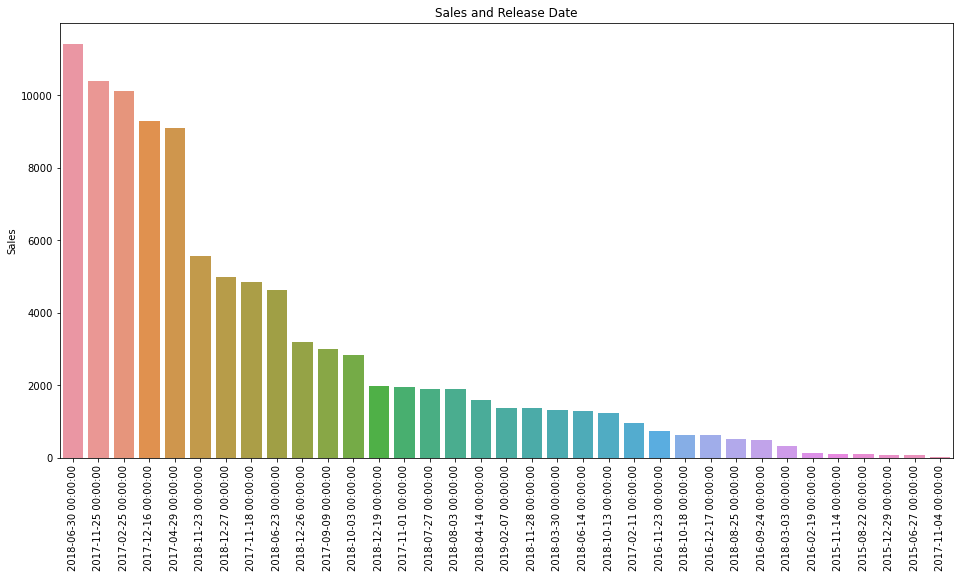

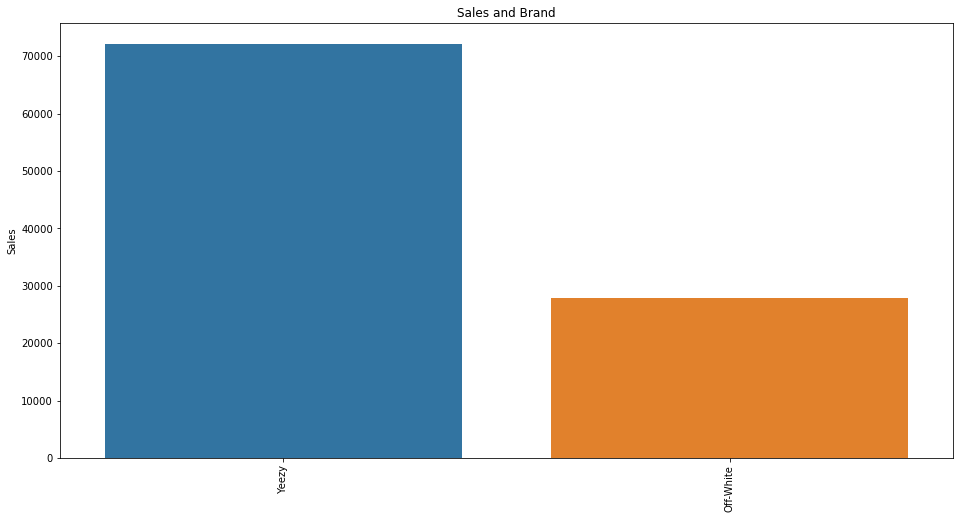

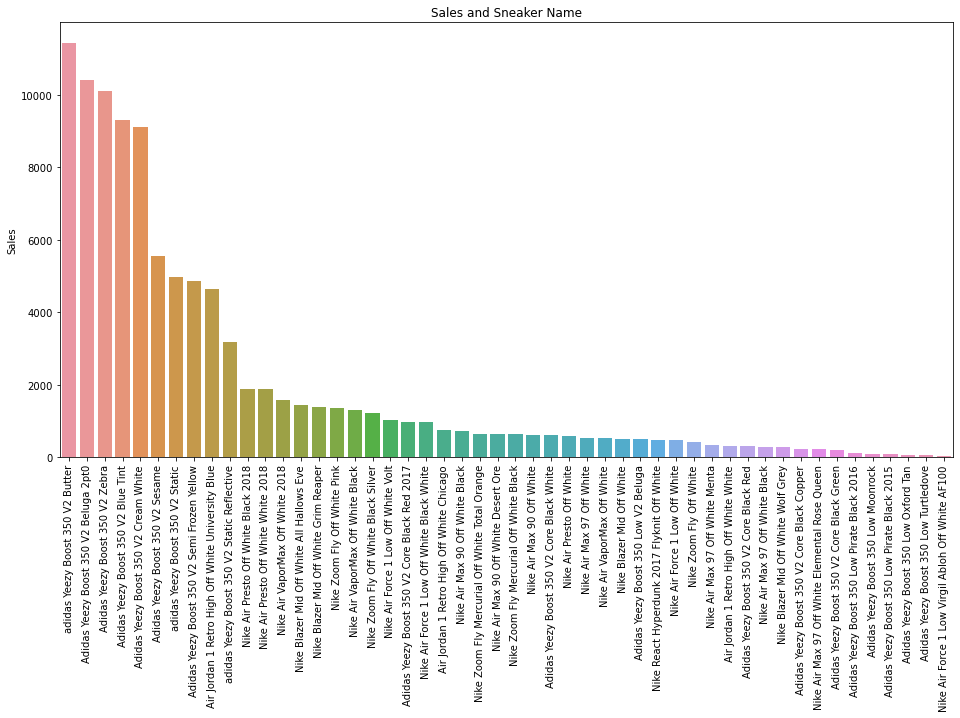

Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]),

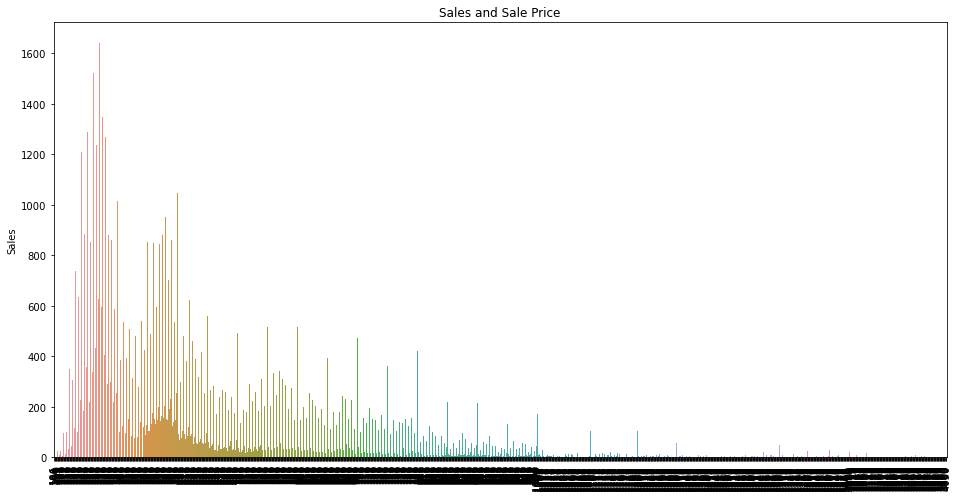

Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1491 ticks ([-1.0, ..., 1489.0]),

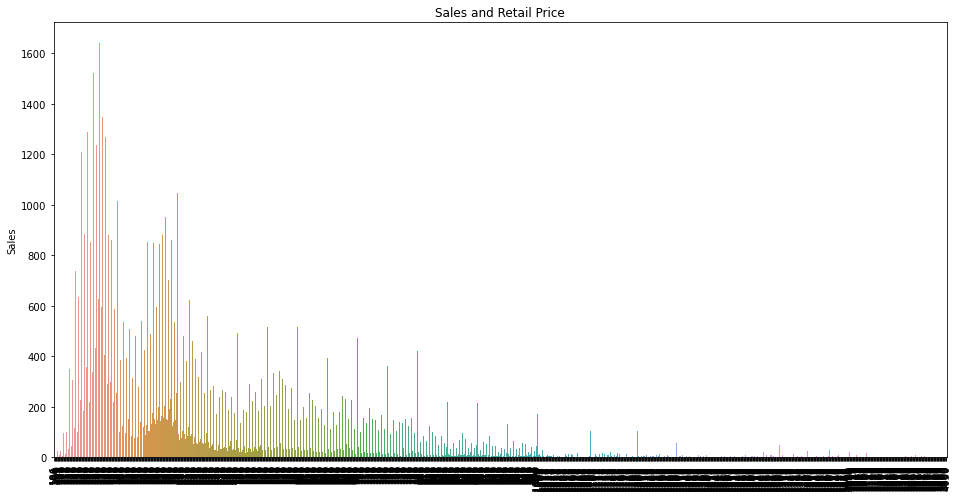

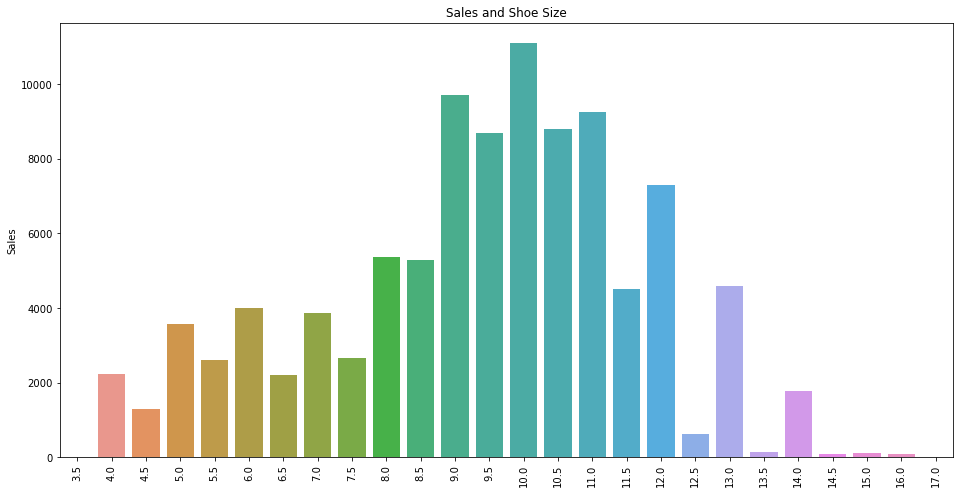

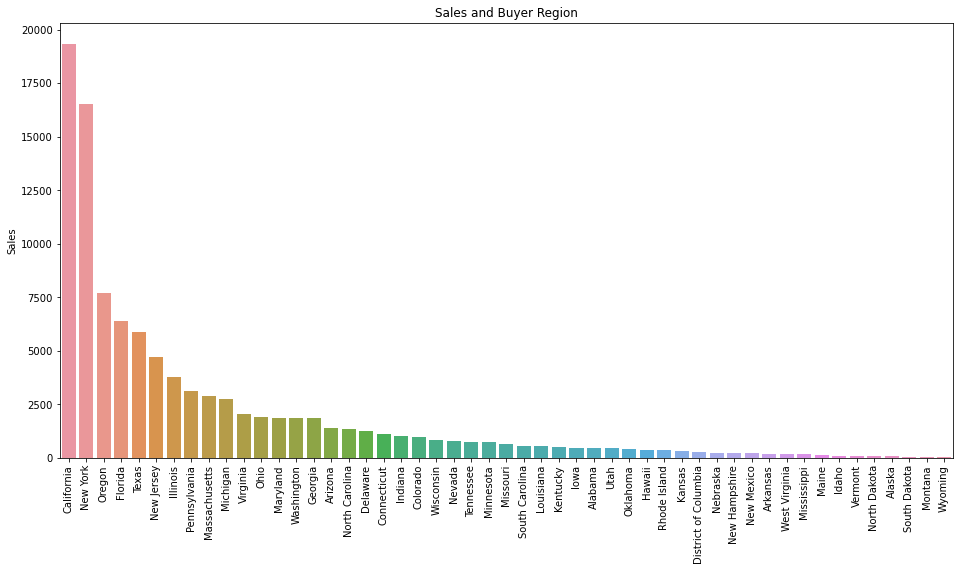

In [108]:
#資料視覺化
print_chart('Release Date')
print_chart('Brand')
print_chart('Sneaker Name')
print_chart('Sale Price')
print_chart('Retail Price')
print_chart('Shoe Size')
print_chart('Buyer Region')

In [109]:
#將時間轉為時間序列，以進行線性回歸
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']=df['Order Date'].map(datetime.datetime.toordinal)
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date']=df['Release Date'].map(datetime.datetime.toordinal)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,736573,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,1097,736231,11.0,California
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,685,736291,11.0,California
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,690,736291,11.0,California
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,1075,736291,11.5,Kentucky
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,828,736371,11.0,Rhode Island


In [110]:
#重新命名Column 有空白不好處理
df = df.rename(columns={
    "Order Date": "Order_Date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region"
    })
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region
0,736573,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,1097,736231,11.0,California
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,685,736291,11.0,California
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,690,736291,11.0,California
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,1075,736291,11.5,Kentucky
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,828,736371,11.0,Rhode Island


In [111]:
#分割訓練資料
X = df.drop(['Sale_Price'], axis = 1)
Y = df.Sale_Price
X.head()

,Order_Date,Brand,Sneaker_Name,Retail_Price,Release_Date,Shoe_Size,Buyer_Region
0,736573,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,736231,11.0,California
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,736291,11.0,California
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,736291,11.0,California
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,736291,11.5,Kentucky
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,736371,11.0,Rhode Island


In [112]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25)

In [113]:
#One Hot Encoding
target = ['Sneaker_Name', 'Buyer_Region', 'Brand']
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
X_train_oh = pd.DataFrame(encoder.fit_transform(X_train[target]))
X_valid_oh = pd.DataFrame(encoder.fit_transform(X_valid[target]))
X_train_oh.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
#將Cloumn名稱復原
X_train_oh.columns = encoder.get_feature_names(target)
X_valid_oh.columns = encoder.get_feature_names(target)
X_valid_oh.head()

,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green,...,Buyer_Region_Texas,Buyer_Region_Utah,Buyer_Region_Vermont,Buyer_Region_Virginia,Buyer_Region_Washington,Buyer_Region_West Virginia,Buyer_Region_Wisconsin,Buyer_Region_Wyoming,Brand_ Yeezy,Brand_Off-White
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
#將index復原
X_train_oh.index = X_train.index
X_valid_oh.index = X_valid.index
X_train_oh.head()

,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green,...,Buyer_Region_Texas,Buyer_Region_Utah,Buyer_Region_Vermont,Buyer_Region_Virginia,Buyer_Region_Washington,Buyer_Region_West Virginia,Buyer_Region_Wisconsin,Buyer_Region_Wyoming,Brand_ Yeezy,Brand_Off-White
65534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
X_train_num = X_train.drop(target, axis = 1)
X_valid_num = X_valid.drop(target, axis = 1)

In [117]:
#將One Hot完的資料表與原先的資料表合起來
X_train_new = pd.concat([X_train_num, X_train_oh], axis = 1)
X_valid_new = pd.concat([X_valid_num, X_valid_oh], axis = 1)

In [118]:
#線性回歸
lm = LinearRegression()
lm.fit(X_train_new, Y_train)

LinearRegression()

In [119]:
prediction = lm.predict(X_valid_new)
prediction

array([246., 262., 330., ..., 591., 489., 263.])

In [120]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
#建立OLS回歸模型
def build_model(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    result = model.fit()
    return X

In [122]:
#計算VIF數值，判定預測結果優劣
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [123]:
X_train_new2 = build_model(X_train_new, Y_train)

In [124]:
checkVIF(X_train_new2)

H:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
H:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
54,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,inf
81,Buyer_Region_Montana,inf
79,Buyer_Region_Mississippi,inf
78,Buyer_Region_Minnesota,inf
77,Buyer_Region_Michigan,inf
...,...,...
31,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,inf
2,Retail_Price,6.11
1,Order_Date,2.30
4,Shoe_Size,1.07


In [125]:
#清除地區因素
X_train_new = X_train_new2.drop(['Buyer_Region_Alabama', 
       'Buyer_Region_Alaska', 'Buyer_Region_Arkansas',
       'Buyer_Region_Colorado', 'Buyer_Region_Connecticut',
       'Buyer_Region_Delaware', 'Buyer_Region_District of Columbia',
       'Buyer_Region_Georgia', 'Buyer_Region_Hawaii', 'Buyer_Region_Idaho',
       'Buyer_Region_Illinois', 'Buyer_Region_Indiana', 'Buyer_Region_Iowa',
       'Buyer_Region_Kansas', 'Buyer_Region_Louisiana', 'Buyer_Region_Maine',
       'Buyer_Region_Massachusetts', 'Buyer_Region_Michigan',
       'Buyer_Region_Minnesota', 'Buyer_Region_Mississippi',
       'Buyer_Region_Missouri', 'Buyer_Region_Montana',
       'Buyer_Region_Nebraska', 'Buyer_Region_Nevada',
       'Buyer_Region_New Hampshire', 'Buyer_Region_New Jersey',
       'Buyer_Region_New Mexico', 'Buyer_Region_New York',
       'Buyer_Region_North Carolina', 'Buyer_Region_North Dakota',
       'Buyer_Region_Ohio', 'Buyer_Region_Oklahoma',
       'Buyer_Region_Pennsylvania', 'Buyer_Region_Rhode Island',
       'Buyer_Region_South Carolina', 'Buyer_Region_South Dakota',
       'Buyer_Region_Tennessee', 'Buyer_Region_Texas', 'Buyer_Region_Utah',
       'Buyer_Region_Vermont', 'Buyer_Region_Virginia',
       'Buyer_Region_Washington', 'Buyer_Region_West Virginia',
       'Buyer_Region_Wyoming',], axis=1)

In [126]:
X_train_new = build_model(X_train_new, Y_train)

In [127]:
X_train_new.head()

,const,Order_Date,Retail_Price,Release_Date,Shoe_Size,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove,...,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Buyer_Region_Arizona,Buyer_Region_California,Buyer_Region_Florida,Buyer_Region_Kentucky,Buyer_Region_Maryland,Buyer_Region_Oregon,Buyer_Region_Wisconsin,Brand_ Yeezy,Brand_Off-White
65534,1.0,737022,272,736385,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65897,1.0,737023,285,736385,11.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
87077,1.0,737067,228,736448,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27902,1.0,736844,1020,736868,9.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
42510,1.0,736912,670,736902,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [128]:
checkVIF(X_train_new)

H:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
H:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
32,Sneaker_Name_Nike Air Max 97 Off White,inf
28,Sneaker_Name_Nike Air Force 1 Low Virgil Abloh...,inf
30,Sneaker_Name_Nike Air Max 90 Off White Black,inf
31,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,inf
33,Sneaker_Name_Nike Air Max 97 Off White Black,inf
...,...,...
58,Buyer_Region_Kentucky,1.01
59,Buyer_Region_Maryland,1.01
61,Buyer_Region_Wisconsin,1.01
55,Buyer_Region_Arizona,1.01


In [131]:
X_train_new = X_train_new.drop(['Brand_Off-White', 'Brand_ Yeezy'], axis=1)
X_train_new = build_model(X_train_new, Y_train)

KeyError: "['Brand_Off-White' 'Brand_ Yeezy'] not found in axis"

In [132]:
X_train_new.head()

,const,Order_Date,Retail_Price,Release_Date,Shoe_Size,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove,...,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Buyer_Region_Arizona,Buyer_Region_California,Buyer_Region_Florida,Buyer_Region_Kentucky,Buyer_Region_Maryland,Buyer_Region_Oregon,Buyer_Region_Wisconsin
65534,1.0,737022,272,736385,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65897,1.0,737023,285,736385,11.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87077,1.0,737067,228,736448,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27902,1.0,736844,1020,736868,9.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42510,1.0,736912,670,736902,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
checkVIF(X_train_new)

H:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
H:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
31,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,inf
42,Sneaker_Name_Nike Blazer Mid Off White,inf
30,Sneaker_Name_Nike Air Max 90 Off White Black,inf
32,Sneaker_Name_Nike Air Max 97 Off White,inf
33,Sneaker_Name_Nike Air Max 97 Off White Black,inf
...,...,...
59,Buyer_Region_Maryland,1.01
61,Buyer_Region_Wisconsin,1.01
58,Buyer_Region_Kentucky,1.01
55,Buyer_Region_Arizona,1.01


In [134]:
#去除影響比較嚴重的幾筆資料
X_train_new = X_train_new.drop(['Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green',
       'Sneaker_Name_Nike Air Force 1 Low Off White',
       'Sneaker_Name_Nike Air Max 90 Off White',
       'Sneaker_Name_Nike Air VaporMax Off White Black'], axis=1)

In [135]:
X_train_new = build_model(X_train_new, Y_train)

In [136]:
checkVIF(X_train_new)

,Features,VIF
0,const,1.108359e+09
3,Release_Date,1.098600e+02
20,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,2.017000e+01
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,1.702000e+01
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,1.631000e+01
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,1.434000e+01
17,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream W...,1.344000e+01
50,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,1.149000e+01
22,Sneaker_Name_Air Jordan 1 Retro High Off White...,6.270000e+00
2,Retail_Price,6.100000e+00


In [138]:
#再建立線性回歸
lm = sm.OLS(Y_train, X_train_new).fit()
result = lm.predict(X_train_new)

In [139]:
result

65534     272.0
65897     285.0
87077     228.0
27902    1020.0
42510     670.0
          ...  
25625     615.0
5438      490.0
67633     350.0
13666     365.0
88055     435.0
Length: 74967, dtype: float64